In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm.auto import tqdm
import scienceplots
pd.set_option('display.max_columns', None)
plt.style.use(['science','notebook']) #plt.style.use(['science','notebook'])
plt.tight_layout()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<Figure size 800x600 with 0 Axes>

In [3]:
DIR = '/Users/bijan1339/Desktop/Research/'
pickle_PATH = '/Users/bijan1339/Desktop/Research/Dataframes/'

output_directory0 = '/Users/bijan1339/Desktop/Research/Final_Output0/'
output_directory1 = '/Users/bijan1339/Desktop/Research/Final_Output1/'
output_directory4 = '/Users/bijan1339/Desktop/Research/Final_Output4/'
output_directory6 = '/Users/bijan1339/Desktop/Research/Final_Output6/'
output_directory7 = '/Users/bijan1339/Desktop/Research/Final_Output/'
output_directory8 = '/Users/bijan1339/Desktop/Research/Final_Output8/'
output_directory9 = '/Users/bijan1339/Desktop/Research/Final_Output9/'

MS_Types = [0.,1.,2.,7.,8.,9.]
RG_Types = [3.,4.,5.,6.]# Giant Branch sequences keys from SSE
WD_Types = [10.,11.,12.] #White Dwarf keys from SSE


In [4]:
df_initial0        = pd.read_pickle(pickle_PATH + 'df_initial0.pkl')
df_final0          = pd.read_pickle(pickle_PATH + 'df_final0.pkl')
merged_df_initial0 = pd.read_pickle(pickle_PATH + 'merged_df_initial0.pkl')
merged_df_final0   = pd.read_pickle(pickle_PATH + 'merged_df_final0.pkl')

df_initial1        = pd.read_pickle(pickle_PATH + 'df_initial1.pkl')
df_final1          = pd.read_pickle(pickle_PATH + 'df_final1.pkl')
merged_df_initial1 = pd.read_pickle(pickle_PATH + 'merged_df_initial1.pkl')
merged_df_final1   = pd.read_pickle(pickle_PATH + 'merged_df_final1.pkl')

df_initial6        = pd.read_pickle(pickle_PATH + 'df_initial6.pkl')
df_final6          = pd.read_pickle(pickle_PATH + 'df_final6.pkl')
merged_df_initial6 = pd.read_pickle(pickle_PATH + 'merged_df_initial6.pkl')
merged_df_final6   = pd.read_pickle(pickle_PATH + 'merged_df_final6.pkl')

df_initial7        = pd.read_pickle(pickle_PATH + 'df_initial7.pkl')
df_final7          = pd.read_pickle(pickle_PATH + 'df_final7.pkl')
merged_df_initial7 = pd.read_pickle(pickle_PATH + 'merged_df_initial7.pkl')
merged_df_final7   = pd.read_pickle(pickle_PATH + 'merged_df_final7.pkl')



In [5]:
m1_merged_df0 = merged_df_final0[merged_df_final0['m1_merged'] == True]
m2_merged_df0 = merged_df_final0[merged_df_final0['m2_merged'] == True]

m1_merged_df1 = merged_df_final1[merged_df_final1['m1_merged'] == True]
m2_merged_df1 = merged_df_final1[merged_df_final1['m2_merged'] == True]

m1_merged_df6 = merged_df_final6[merged_df_final6['m1_merged'] == True]
m2_merged_df6 = merged_df_final6[merged_df_final6['m2_merged'] == True]

m1_merged_df7 = merged_df_final7[merged_df_final7['m1_merged'] == True]
m2_merged_df7 = merged_df_final7[merged_df_final7['m2_merged'] == True]


wdwd_after_merger1 = pd.concat( [m1_merged_df1.query("startype2 == 'WD' and startype3 == 'WD'"), m2_merged_df1.query("startype1 == 'WD' and startype3 == 'WD'")])
wdwd_after_merger6 = pd.concat( [m1_merged_df6.query("startype2 == 'WD' and startype3 == 'WD'"), m2_merged_df6.query("startype1 == 'WD' and startype3 == 'WD'")])
wdwd_after_merger7 = pd.concat( [m1_merged_df7.query("startype2 == 'WD' and startype3 == 'WD'"), m2_merged_df7.query("startype1 == 'WD' and startype3 == 'WD'")])
wdwd_after_merger0 = pd.concat( [m1_merged_df0.query("startype2 == 'WD' and startype3 == 'WD'"), m2_merged_df0.query("startype1 == 'WD' and startype3 == 'WD'")])

In [6]:
binaries_WDWD = pd.read_csv(pickle_PATH + 'Table_A1.csv')[['source_id_1', 'source_id_2', 'MassH_1', 'MassH_2', 'cool_ageH_1', 'cool_ageH_2', 
                                                           'init_mass_1', 'init_mass_2','tot_age_1', 'tot_age_2', 'sep_AU', 'R_chance_align',
                                                           'e_MassH_upper_1', 'e_MassH_lower_1', 'e_cool_ageH_upper_1', 'e_cool_ageH_lower_1',
                                                           'e_init_mass_upper_1', 'e_init_mass_lower_1', 'e_tot_age_upper_1', 'e_tot_age_lower_1',
                                                           'e_MassH_upper_2', 'e_MassH_lower_2', 'e_cool_ageH_upper_2', 'e_cool_ageH_lower_2',
                                                           'e_init_mass_upper_2', 'e_init_mass_lower_2', 'e_tot_age_upper_2', 'e_tot_age_lower_2']]
binaries_WDWD.head()

,source_id_1,source_id_2,MassH_1,MassH_2,cool_ageH_1,cool_ageH_2,init_mass_1,init_mass_2,tot_age_1,tot_age_2,sep_AU,R_chance_align,e_MassH_upper_1,e_MassH_lower_1,e_cool_ageH_upper_1,e_cool_ageH_lower_1,e_init_mass_upper_1,e_init_mass_lower_1,e_tot_age_upper_1,e_tot_age_lower_1,e_MassH_upper_2,e_MassH_lower_2,e_cool_ageH_upper_2,e_cool_ageH_lower_2,e_init_mass_upper_2,e_init_mass_lower_2,e_tot_age_upper_2,e_tot_age_lower_2
0,1003080575370626944,1003080575370617728,0.647,0.599,8.0041,7.2616,2.321,1.180,8.9655,13.6651,658.372570,7.931599e-06,0.061,0.060,0.6026,0.3149,0.673,1.291,9.3585,0.5927,0.059,0.060,0.7462,0.4692,1.337,0.561,51.4788,5.6627
1,100536353946761728,100536353946762112,0.483,0.472,1.5763,1.8578,0.130,0.038,2372.2925,NaN,1677.455167,1.949616e-04,0.067,0.073,0.0987,0.1324,0.579,0.636,NaN,2333.6667,0.077,0.080,0.1471,0.1940,0.668,0.693,NaN,NaN
2,1006533767732900736,1006533763440848256,0.719,0.540,1.9364,1.1852,3.064,0.622,2.3678,58.1477,620.838313,9.181447e-07,0.055,0.060,0.1273,0.2182,0.299,0.541,0.3487,0.2413,0.051,0.051,0.0406,0.0481,0.446,0.447,1404.0893,47.9153
3,1008929564913828224,1008929569208837376,0.683,0.669,0.8133,0.5288,2.808,2.659,1.3673,1.1826,854.183094,6.642287e-06,0.040,0.042,0.0167,0.0181,0.283,0.582,0.5231,0.1340,0.034,0.035,0.0131,0.0111,0.295,0.555,0.6018,0.1748
4,1013776353903292928,1013776353903293056,0.664,0.581,0.0821,0.4362,2.594,0.986,0.7827,12.4604,667.621073,2.446192e-08,0.019,0.019,0.0029,0.0033,0.213,0.302,0.2909,0.1462,0.016,0.017,0.0056,0.0053,0.152,0.146,9.0277,4.7986


In [7]:
mergers_df1 = pd.read_pickle(DIR + 'mergers_df1').dropna(subset=['e'])
mergers_df6 = pd.read_pickle(DIR + 'mergers_df6').dropna(subset=['e'])

mergers_df1_kicks = pd.read_pickle(DIR + 'mergers_df1_kicks').dropna(subset=['e'])
mergers_df6_kicks = pd.read_pickle(DIR + 'mergers_df6_kicks').dropna(subset=['e'])


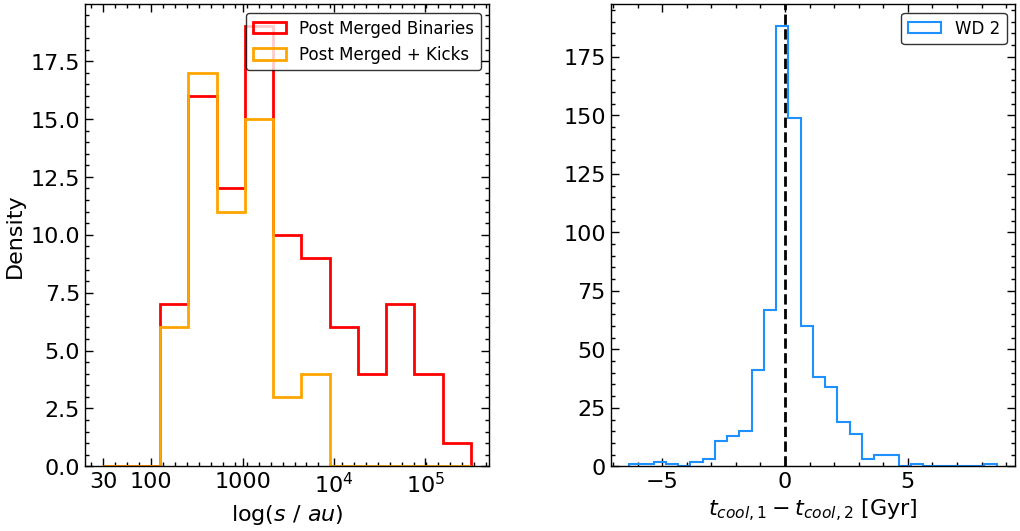

In [20]:
# smas_f = np.loadtxt(DIR + 'smas_f.txt') #from SSE_Mergers
obs_binaries = binaries_WDWD.query("(R_chance_align < 0.1)")
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6),gridspec_kw=dict(hspace=0,wspace=0.3))
(ax1, ax2) = axes

bins=np.linspace(np.log10(30),5.5,14)
# ax1.hist(np.log10(binaries_WDWD['sep_AU']),histtype='stepfilled',bins=bins,linewidth=1.5, density=True, color='gray', label='All DWDs', alpha=0.25);
# ax1.hist(np.log10(obs_binaries['sep_AU']),histtype='stepfilled',bins=bins,linewidth=1.0, density=False, color='gray', label='Strange DWDs',edgecolor='k', alpha=0.5);
ax1.hist(np.log10(mergers_df6.query("180 < a <1e6 and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=bins,linewidth=2.0, density=False, color='r', label='Post Merged Binaries');
ax1.hist(np.log10(mergers_df6_kicks.query("180 < a <1e6 and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=bins,linewidth=2.0, density=False, color='orange', label='Post Merged + Kicks');
# ax1.hist(np.log10(mergers_df1.query("180 < a < 1e6")['a'].tolist()),hi
# ()),histtype='step',bins=bins,linewidth=2.0, density=False, color='deepskyblue', label='Post Merged + Kicks');

# ax2.hist(binaries_WDWD.query("tot_age_1 < 15")['tot_age_1'],histtype='step',bins=30, density=False, color='magenta', alpha=1.0, linewidth=1.5, label='WD 1');
n, bins, patches = ax2.hist(obs_binaries.query("tot_age_2 < 14")['cool_ageH_1'] - obs_binaries.query("tot_age_2 < 14")['cool_ageH_2'],histtype='step',bins=30, density=False, color='dodgerblue', alpha=1.0, linewidth=1.5, label='WD 2');
# ax2.scatter(np.log10(binaries_WDWD['tot_age_1']), np.log10(binaries_WDWD['tot_age_2']))
# ax2.axvline(13.8, linestyle='dashed',color='k',linewidth=2.5, label='13.8 Gyr')

ax1.set_xticks([np.log10(30),2,3,4,5],['30','100','1000','10$^{4}$','10$^{5}$'])
ax1.set_xlabel('$\log(s~/~au)$')
ax1.set_ylabel('Density')
ax2.set_xlabel('$t_{cool,1} - t_{cool,2}$ [Gyr]')
ax2.axvline(0, color='k', linestyle='dashed')
# ax2.fill_between(x, -5, 0, alpha=0.3, color='gray', label='Unphysical (Triples?)')
# bins=bins[:-1]
# mask = (bins <= 0)
# ax2.fill_between(bins[mask], n[mask], color='gray', alpha=0.5, label='Shaded Area')

ax1.legend(frameon=-1, edgecolor='k',loc=1, fontsize=12)
ax2.legend(frameon=-1, edgecolor='k',loc=1, fontsize=12)

# plt.savefig(DIR + 'Figures/DWD_sep_age.pdf')

In [22]:
binaries_WDWD

,source_id_1,source_id_2,MassH_1,MassH_2,cool_ageH_1,cool_ageH_2,init_mass_1,init_mass_2,tot_age_1,tot_age_2,sep_AU,R_chance_align,e_MassH_upper_1,e_MassH_lower_1,e_cool_ageH_upper_1,e_cool_ageH_lower_1,e_init_mass_upper_1,e_init_mass_lower_1,e_tot_age_upper_1,e_tot_age_lower_1,e_MassH_upper_2,e_MassH_lower_2,e_cool_ageH_upper_2,e_cool_ageH_lower_2,e_init_mass_upper_2,e_init_mass_lower_2,e_tot_age_upper_2,e_tot_age_lower_2
0,1003080575370626944,1003080575370617728,0.647,0.599,8.0041,7.2616,2.321,1.180,8.9655,13.6651,658.372570,7.931599e-06,0.061,0.060,0.6026,0.3149,0.673,1.291,9.3585,0.5927,0.059,0.060,0.7462,0.4692,1.337,0.561,51.4788,5.6627
1,100536353946761728,100536353946762112,0.483,0.472,1.5763,1.8578,0.130,0.038,2372.2925,NaN,1677.455167,1.949616e-04,0.067,0.073,0.0987,0.1324,0.579,0.636,NaN,2333.6667,0.077,0.080,0.1471,0.1940,0.668,0.693,NaN,NaN
2,1006533767732900736,1006533763440848256,0.719,0.540,1.9364,1.1852,3.064,0.622,2.3678,58.1477,620.838313,9.181447e-07,0.055,0.060,0.1273,0.2182,0.299,0.541,0.3487,0.2413,0.051,0.051,0.0406,0.0481,0.446,0.447,1404.0893,47.9153
3,1008929564913828224,1008929569208837376,0.683,0.669,0.8133,0.5288,2.808,2.659,1.3673,1.1826,854.183094,6.642287e-06,0.040,0.042,0.0167,0.0181,0.283,0.582,0.5231,0.1340,0.034,0.035,0.0131,0.0111,0.295,0.555,0.6018,0.1748
4,1013776353903292928,1013776353903293056,0.664,0.581,0.0821,0.4362,2.594,0.986,0.7827,12.4604,667.621073,2.446192e-08,0.019,0.019,0.0029,0.0033,0.213,0.302,0.2909,0.1462,0.016,0.017,0.0056,0.0053,0.152,0.146,9.0277,4.7986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,779305808516517376,779305808516231552,0.535,0.294,1.0064,0.9545,0.584,-1.509,68.2769,NaN,182.537698,NaN,0.019,0.021,0.0135,0.0145,0.166,0.179,86.2967,36.5125,0.009,0.009,0.0144,0.0143,0.074,0.078,NaN,NaN
1587,929001804082135168,929001804082135296,0.617,0.598,0.3728,0.6525,1.550,1.163,2.9649,7.3797,1023.430194,NaN,0.017,0.016,0.0106,0.0106,0.541,0.343,3.3585,1.3153,0.023,0.023,0.0068,0.0065,0.543,0.228,7.7047,4.7975
1588,4190500054845023488,4190500054845023488,0.656,0.633,0.0614,0.3250,2.485,2.079,0.8509,1.6227,6485.176800,NaN,0.017,0.017,0.0021,0.0023,0.231,0.293,0.3352,0.1750,0.011,0.012,0.0051,0.0055,0.200,0.366,0.6127,0.2895
1589,4190500054845023488,4190499986125543168,0.656,0.577,0.0614,0.0469,2.485,0.947,0.8509,13.9094,302.342604,NaN,0.017,0.017,0.0021,0.0023,0.231,0.293,0.3352,0.1750,0.018,0.018,0.0024,0.0023,0.159,0.160,12.4852,5.8477


Text(0.05, 0.9, 'Model OB')

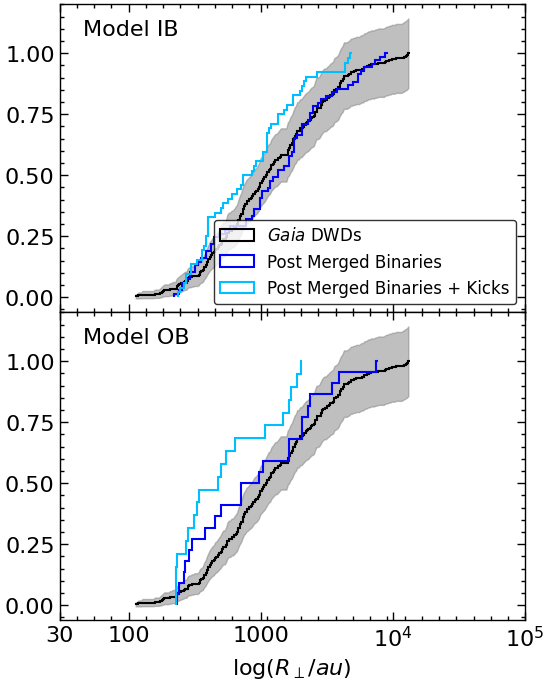

In [26]:
strange_binaries = binaries_WDWD.query("(cool_ageH_1 + 3*e_cool_ageH_upper_1) < (cool_ageH_2 - 3*e_cool_ageH_lower_2) and R_chance_align < 0.1 and sep_AU <=10**4.1")

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(6,8),gridspec_kw=dict(hspace=0,wspace=0.0), sharey=True, sharex=True)
(ax1, ax2) = axes


# n, bins, patches = ax1.hist(np.log10(binaries_WDWD['sep_AU']),histtype='stepfilled',bins=30,linewidth=1.5, density=True, color='gray', label='DWD Binaries', alpha=0.25, cumulative=True);
# patches[0].set_xy(patches[0].get_xy()[:-1])

n, bins, patches = ax1.hist(np.log10(strange_binaries['sep_AU'] * 1.10),histtype='step',bins=200,linewidth=1.5, density=True, color='k', label='$Gaia$ DWDs', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

bin_centers1 = 0.5 * (bins[1:] + bins[:-1])
y_err1 = np.sqrt(n/np.max(n)) / 7        
ax1.fill_between(bins[:-1], n-y_err1, n+y_err1, color='gray', alpha=0.5)

n, bins, patches = ax1.hist(np.log10(mergers_df6.query("220 < a < @strange_binaries.sep_AU.max() and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=80,linewidth=1.5, density=True, color='b', label='Post Merged Binaries', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

n, bins, patches = ax1.hist(np.log10(mergers_df6_kicks.query("220 < a < @strange_binaries.sep_AU.max() and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=80,linewidth=1.5, density=True, color='deepskyblue', label='Post Merged Binaries + Kicks', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

n, bins, patches = ax2.hist(np.log10(strange_binaries['sep_AU'] * 1.10),histtype='step',bins=200,linewidth=1.5, density=True, color='k', label='DWD Binaries', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

bin_centers1 = 0.5 * (bins[1:] + bins[:-1])
y_err1 = np.sqrt(n/np.max(n)) / 7        
ax2.fill_between(bins[:-1], n-y_err1, n+y_err1, color='gray', alpha=0.5)

n, bins, patches = ax2.hist(np.log10(mergers_df1.query("220 < a < @strange_binaries.sep_AU.max() and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=150,linewidth=1.5, density=True, color='b', label='Post Merged Binaries', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

n, bins, patches = ax2.hist(np.log10(mergers_df1_kicks.query("220 < a < @strange_binaries.sep_AU.max() and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=150,linewidth=1.5, density=True, color='deepskyblue', label='Post Merged + Kicks', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

ax1.set_xticks([np.log10(30),2,3,4,5],['30','100','1000','10$^{4}$','10$^{5}$'])
# ax1.set_xlabel('$\log(R_\perp/au)$')
# ax1.set_ylabel('CDF')

ax2.set_xticks([np.log10(30),2,3,4,5],['30','100','1000','10$^{4}$','10$^{5}$'])
ax2.set_xlabel('$\log(R_\perp/au)$')

ax1.legend(frameon=-1, edgecolor='k',loc=4, fontsize=12)

ax1.text(0.05,0.9,'Model IB', fontsize=16, transform=ax1.transAxes)
ax2.text(0.05,0.9,'Model OB', fontsize=16, transform=ax2.transAxes)
